# **Econometria Aplicada**

## Aula 6 - Introdução à séries temporais
---



**Motivação**:

O mercado de crédito no Brasil apresenta diversos tipos de produtos financeiros diferentes, a depender das distintas necessidades que o tomador possui. Um dos produtos mais caros e pronto acesso é o chamado ‘cheque especial’. Com base nos dados disponibilizados pelo Banco Central do Brasil, quais os padrões que podemos identificar na série de concessões mensais à pessoa física?

### **Bibliotecas**

In [32]:
# Obter os dados do SGS do Banco Central do Brasil
install.packages("rbcb")

# Gráficos de sazonalidade
install.packages("forecast")

# Testes de raiz unitária
install.packages("urca")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
library(dplyr)
library(forecast)
library(ggplot2)
library(rbcb)
library(urca)

### **Dados**

In [16]:
# Obter a série de concessões de cheque especial para pessoas físicas
sgs <- as.data.frame(get_series(20665, as = "ts" ))

# Renomear a coluna x para cheque
sgs <- rename(sgs, cheque = x)

# Adicionar uma variável com o mês
sgs$mes = time( sgs$cheque )

In [17]:
head( sgs, 5 )

,cheque,mes
,<dbl>,<dbl>
1,23978,2011.167
2,22810,2011.250
3,25500,2011.333
4,24763,2011.417
5,24016,2011.500


In [18]:
str( sgs )

'data.frame':	147 obs. of  2 variables:
 $ cheque: Time-Series  from 2011 to 2023: 23978 22810 25500 24763 24016 ...
 $ mes   : Time-Series  from 2011 to 2023: 2011 2011 2011 2011 2012 ...


### **Visualização de Dados**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


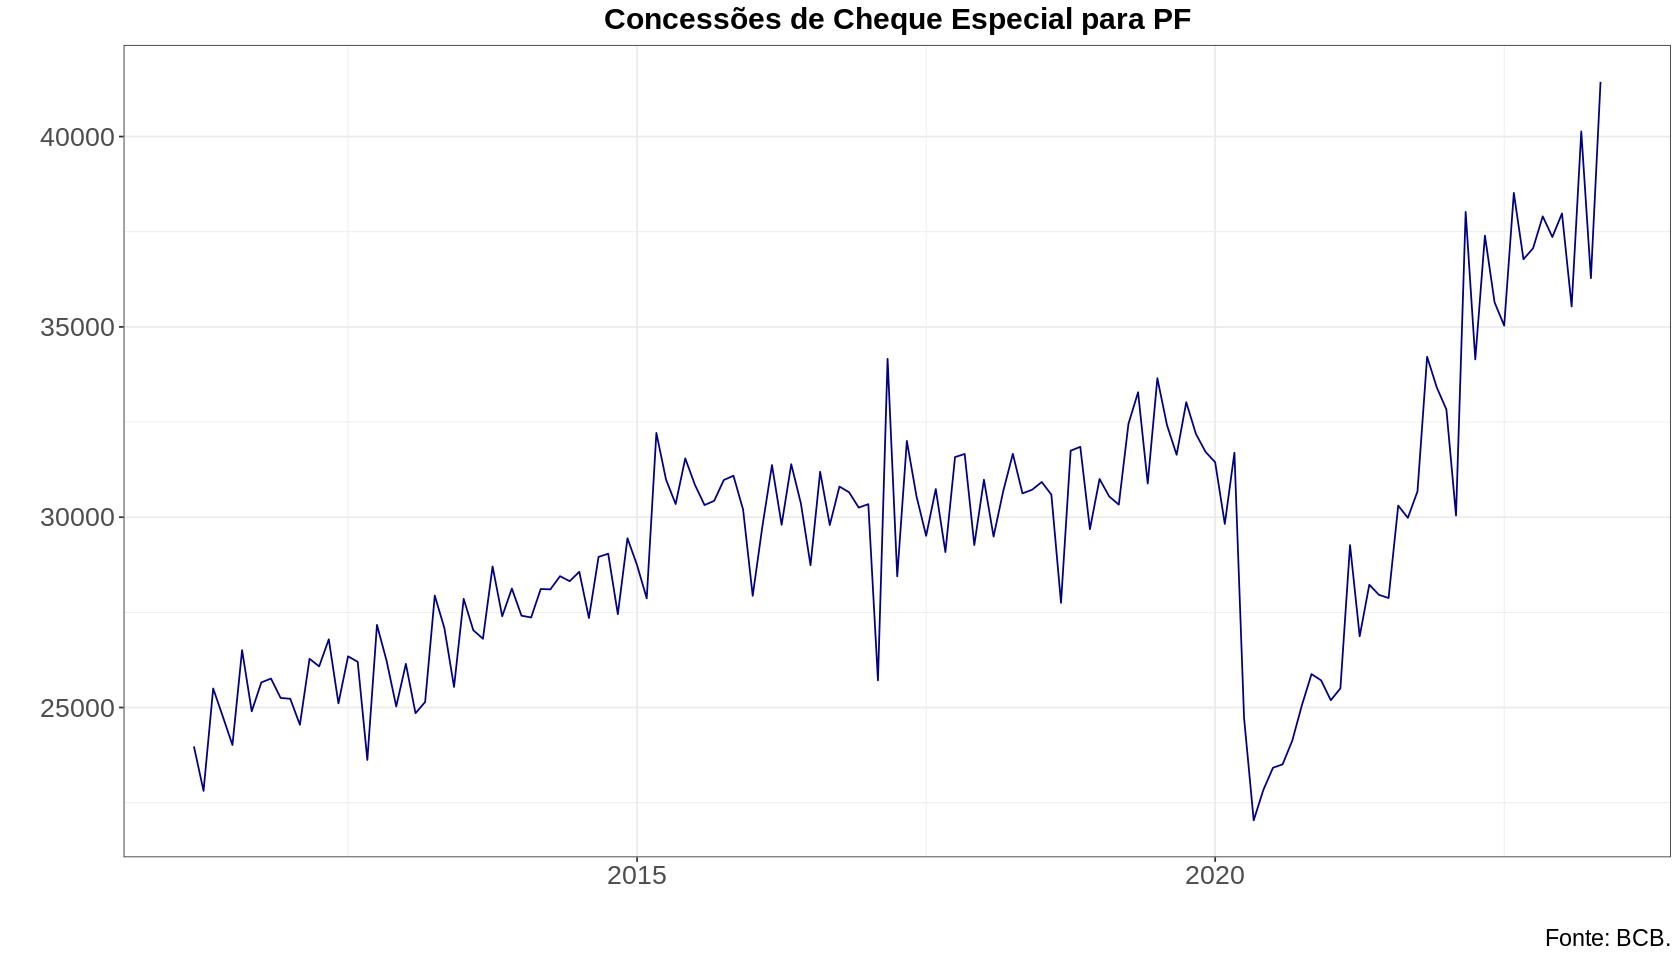

In [51]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
ggplot(sgs, aes(x = mes, y = cheque)) +
  geom_line(color = "navy") +
  labs(x = "", y = "") +
  ggtitle("Concessões de Cheque Especial para PF") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  labs(caption = "Fonte: BCB.")

### **Sazonalidade**

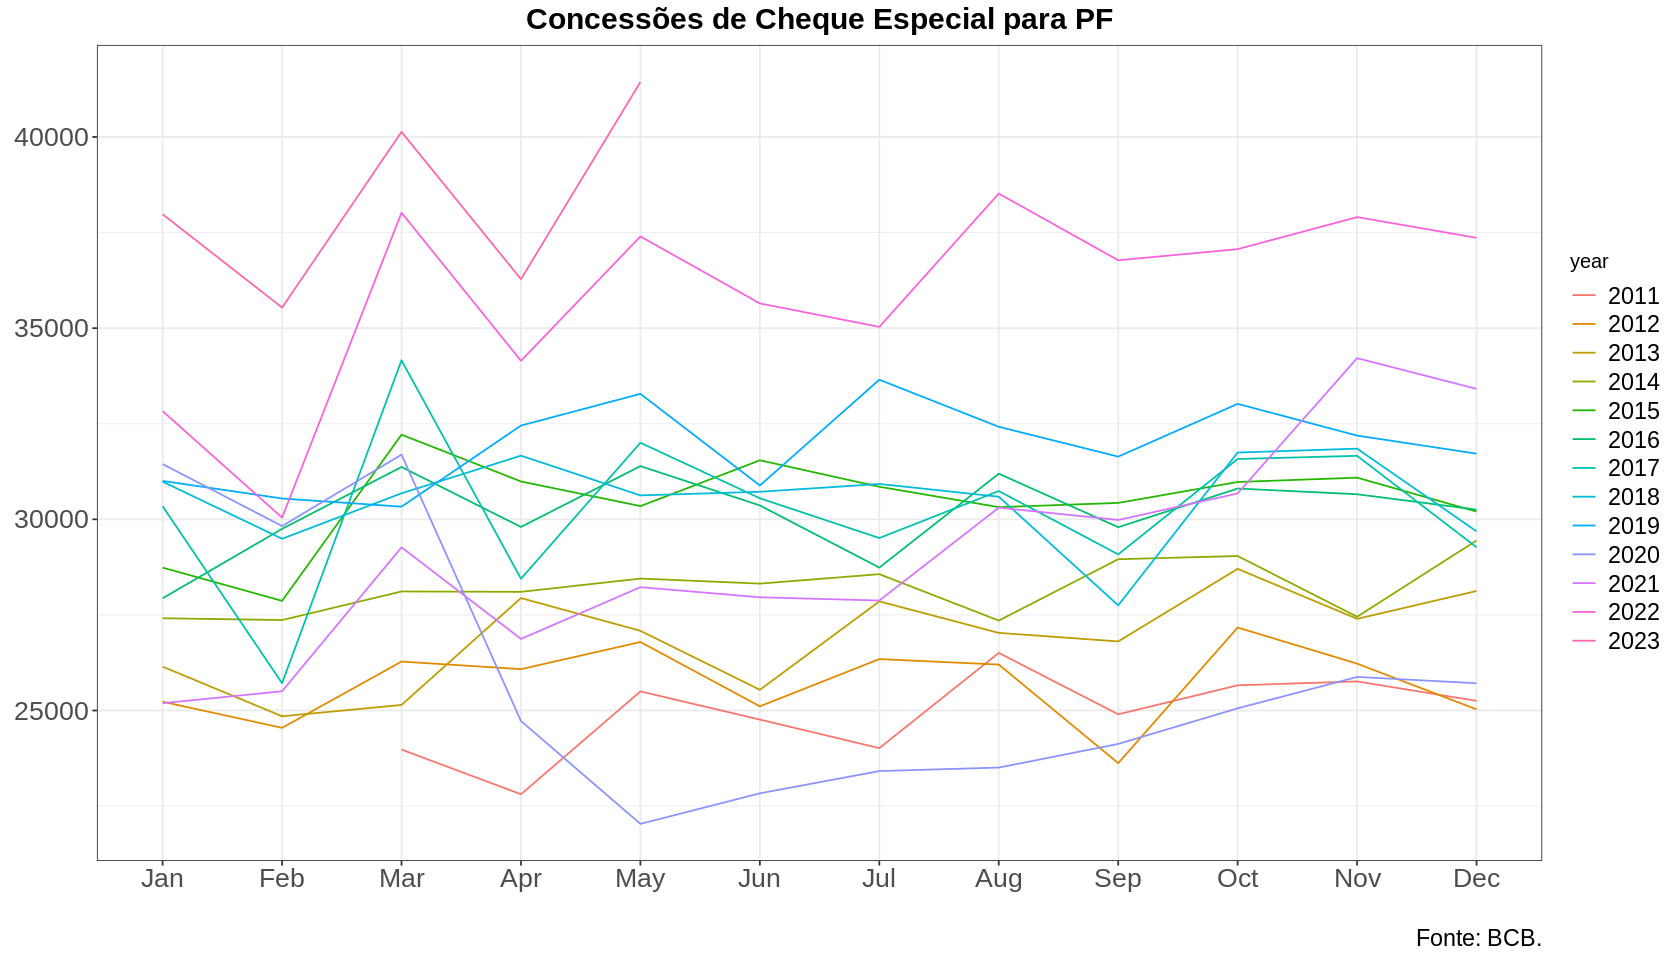

In [50]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
ggseasonplot(sgs$cheque) +
  theme_bw() +
  labs(x = "", y = "") +
  ggtitle("Concessões de Cheque Especial para PF") +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust = 1),
        axis.title.x = element_text(size = 16, vjust = 0.5, hjust = 1),
        text = element_text(size = 12),
        legend.text = element_text(size = 14),
        plot.caption = element_text(size = 14)) +
  labs(caption = "Fonte: BCB.")

**Resultado**

- As concessões de cheque especial para PF parecem ter picos especialmente em Mar e Ago.

### **Função de Autocorrelação**

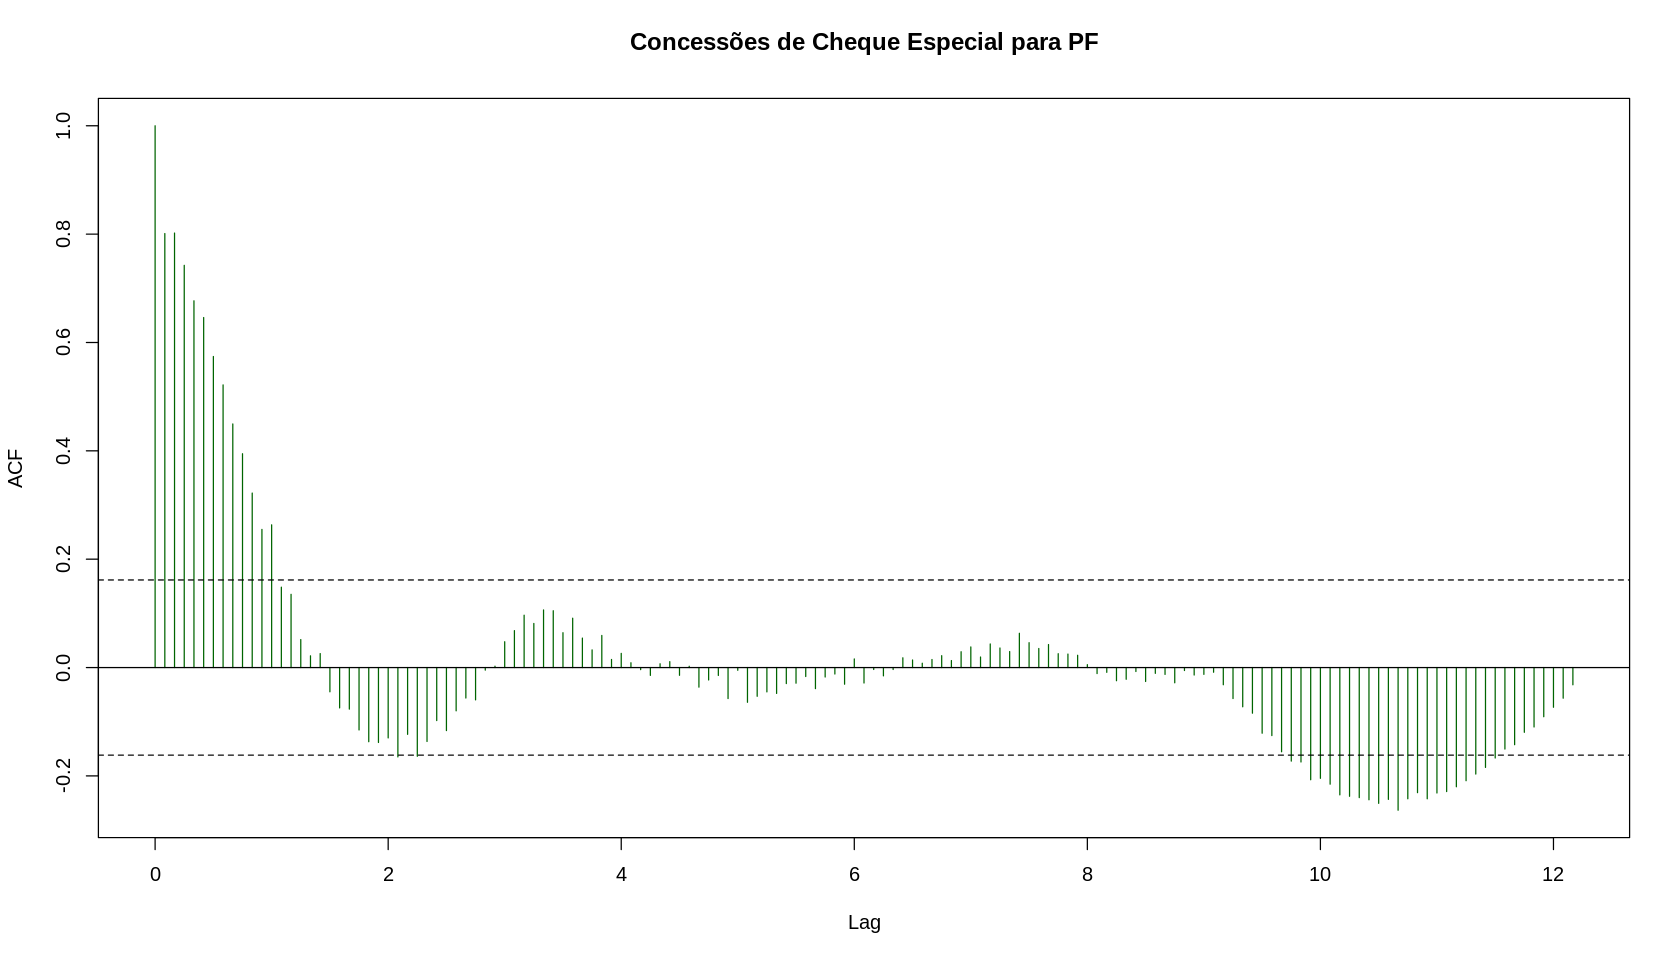

In [30]:
acf(sgs$cheque,
    main = "Concessões de Cheque Especial para PF",
    col = "darkgreen",
    ci.col = "black",
    lag.max = length(sgs$cheque) - 1)

**Resultado**

- A série temporal apresenta uma memória de cerca de 2 anos, uma vez que a autocorrelação até lag = 2 apresenta uma certa intensidade.
- Em especial, valores de 10 a 12 anos atrás também parecem apresentar certo nível de correlação.

### **Função de Autocorrelação Parcial**

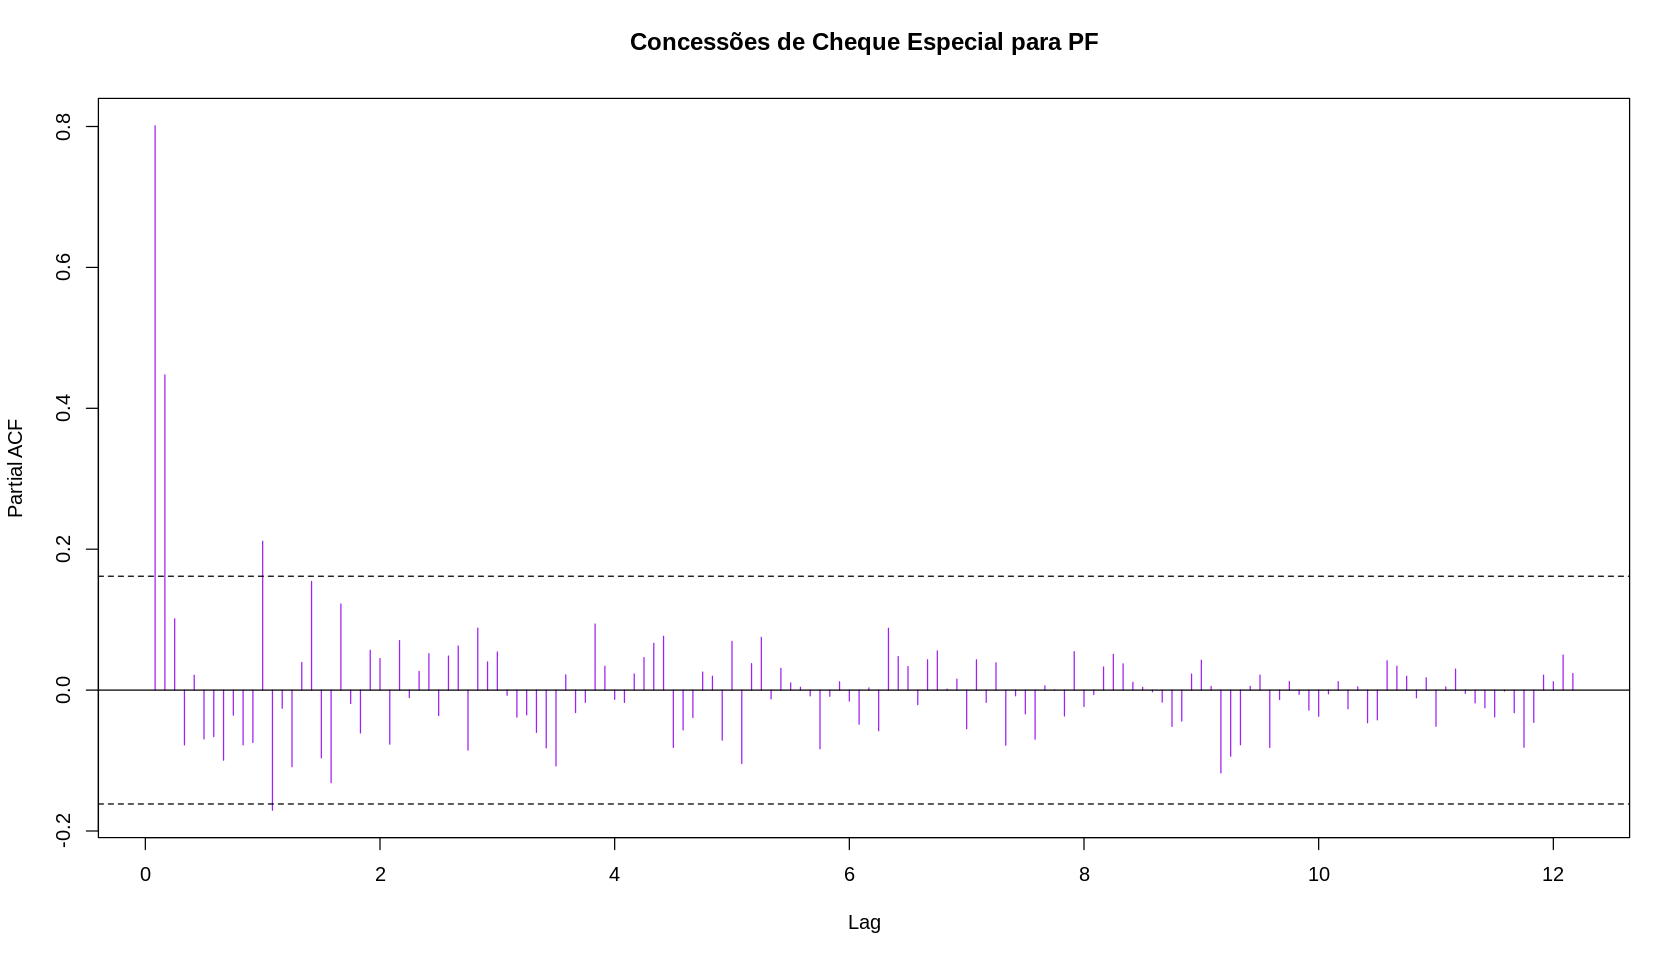

In [31]:
pacf( sgs$cheque,
      main = "Concessões de Cheque Especial para PF",
      col = "purple",
      ci.col = "black",
      lag.max = length(sgs$cheque) - 1)

**Resultado**

- A série temporal é impactada principalmente por valores até 6 meses anteriores.

### **Testes de raiz unitária**

#### **ADF (Augmented-Dickey-Fuller)**

- Teste de Hipótese
  - $H_0$: possui raiz unitária
  - $H_a$: não possui raiz unitária

- Nível de Significância
  - α = 5%

In [34]:
summary( ur.df( sgs$cheque, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-7202.3  -729.0    95.4   852.6  4955.3 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3589.30937 1968.82459   1.823   0.0708 .  
z.lag.1        -0.13964    0.07466  -1.870   0.0639 .  
tt              8.40684    4.82973   1.741   0.0843 .  
z.diff.lag1    -0.52387    0.10778  -4.860 3.61e-06 ***
z.diff.lag2    -0.10263    0.11242  -0.913   0.3631    
z.diff.lag3     0.12339    0.10960   1.126   0.2625    
z.diff.lag4     0.08279    0.11020   0.751   0.4540    
z.diff.lag5     0.20218    0.11109   1.820   0.0713 .  
z.diff.lag6     0.20776    0.11355   1.830   0.0698 .  
z.diff.lag7     0.18510    0.11551   1.602   0.1117    
z.diff.lag8     0.15306    0.11720   1.306

**Resultado**

- Como, em módulo, os valores de test-statistic são menores que tau3, phi2 e phi3, não se rejeita nenhuma das hipóteses nulas para o nível de significância escolhido de 5%, ou seja, a série temporal possui raiz unitária, o que significa que é não-estacionária.

#### **KPSS**

- Teste de Hipótese
  - $H_0$: não possui raiz unitária
  - $H_a$: possui raiz unitária

- Nível de Significância
  - α = 5%

In [36]:
summary( ur.kpss( sgs$cheque, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.1866 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula para o nível de significância escolhido de 5%, ou seja, a série possui raiz unitária, o que significa que é não-estacionária.

### **Estacionariedade**

In [71]:
cheque_diff = diff( log(sgs$cheque) )

In [72]:
sgs_diff <- data.frame( cheque_diff, mes = time( cheque_diff ) )

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


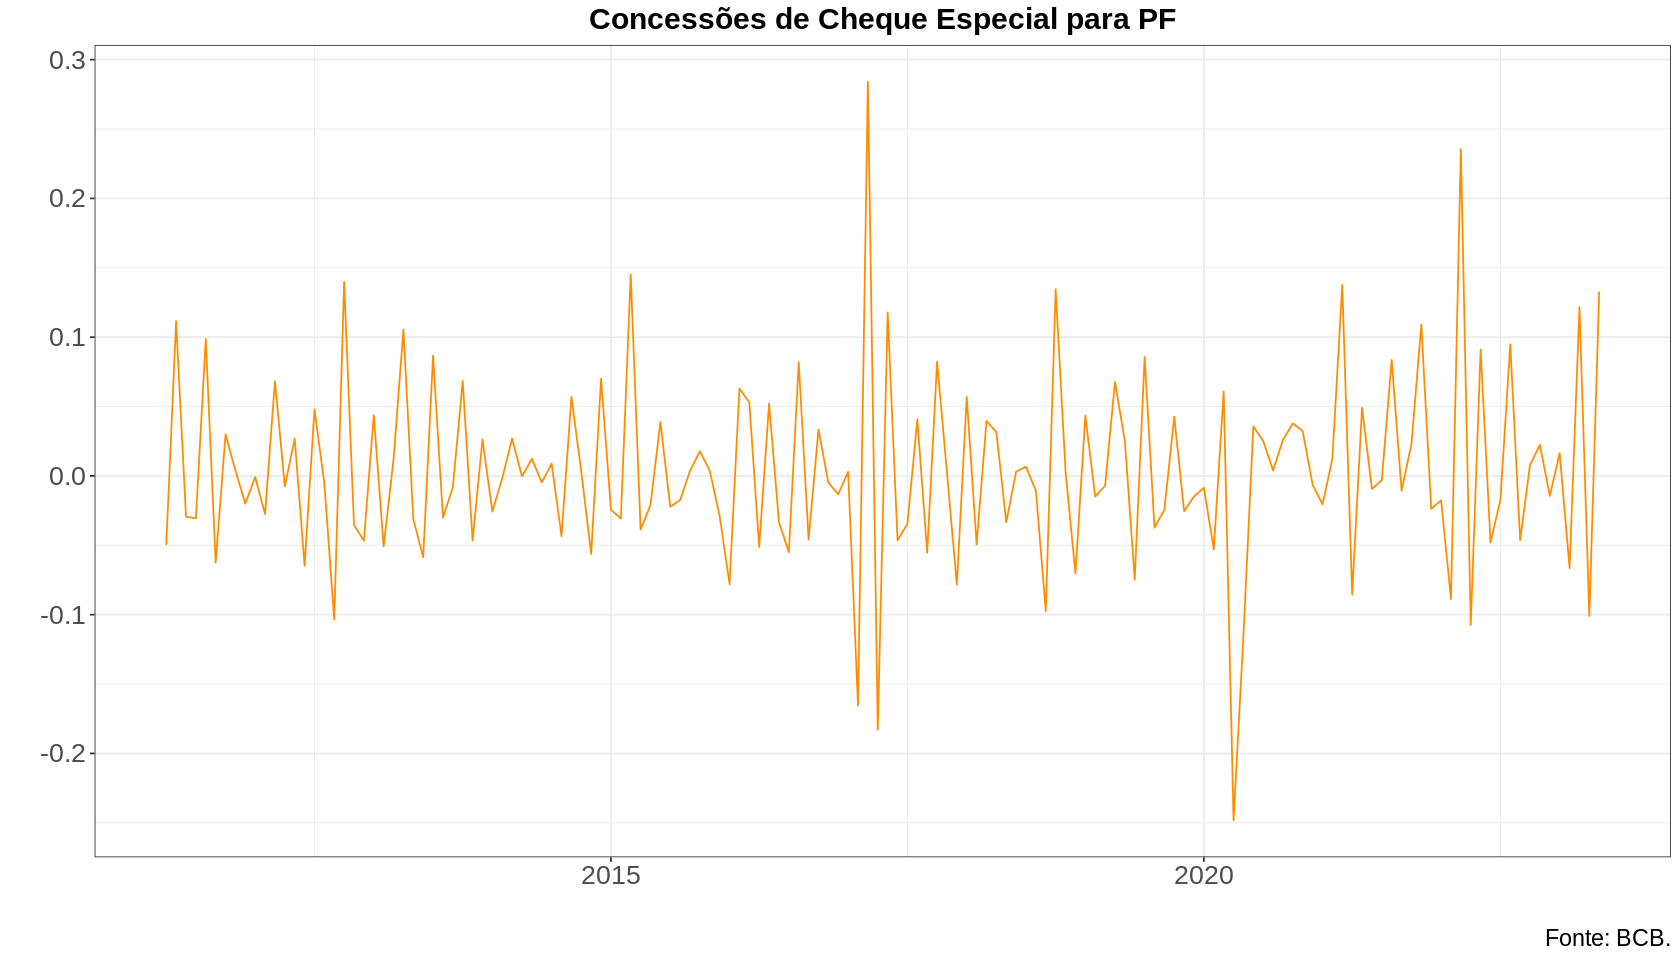

In [73]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
ggplot(sgs_diff, aes(x = mes, y = cheque_diff)) +
  geom_line(color = "darkorange") +
  labs(x = "", y = "") +
  ggtitle("Concessões de Cheque Especial para PF") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  labs(caption = "Fonte: BCB.")

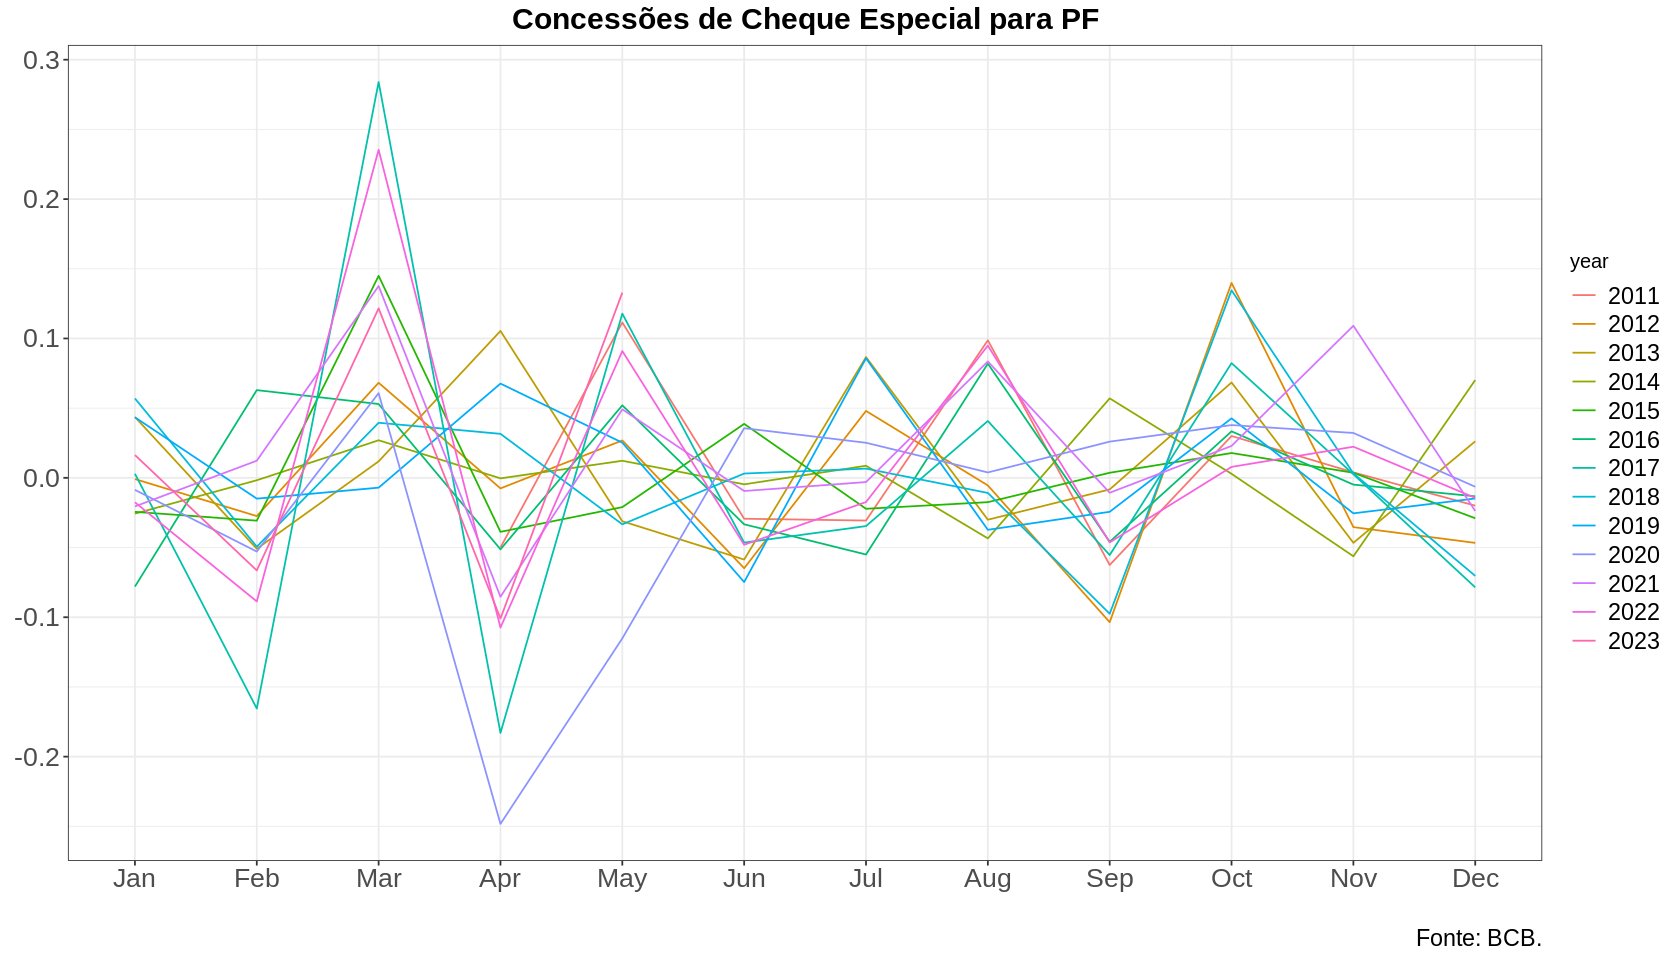

In [74]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 14, repr.plot.height = 8)

# Criar o objeto de plotagem usando ggplot
ggseasonplot(sgs_diff$cheque_diff) +
  theme_bw() +
  labs(x = "", y = "") +
  ggtitle("Concessões de Cheque Especial para PF") +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title.y = element_text(size = 16, angle = 360, vjust = 0.5, hjust = 1),
        axis.title.x = element_text(size = 16, vjust = 0.5, hjust = 1),
        text = element_text(size = 12),
        legend.text = element_text(size = 14),
        plot.caption = element_text(size = 14)) +
  labs(caption = "Fonte: BCB.")

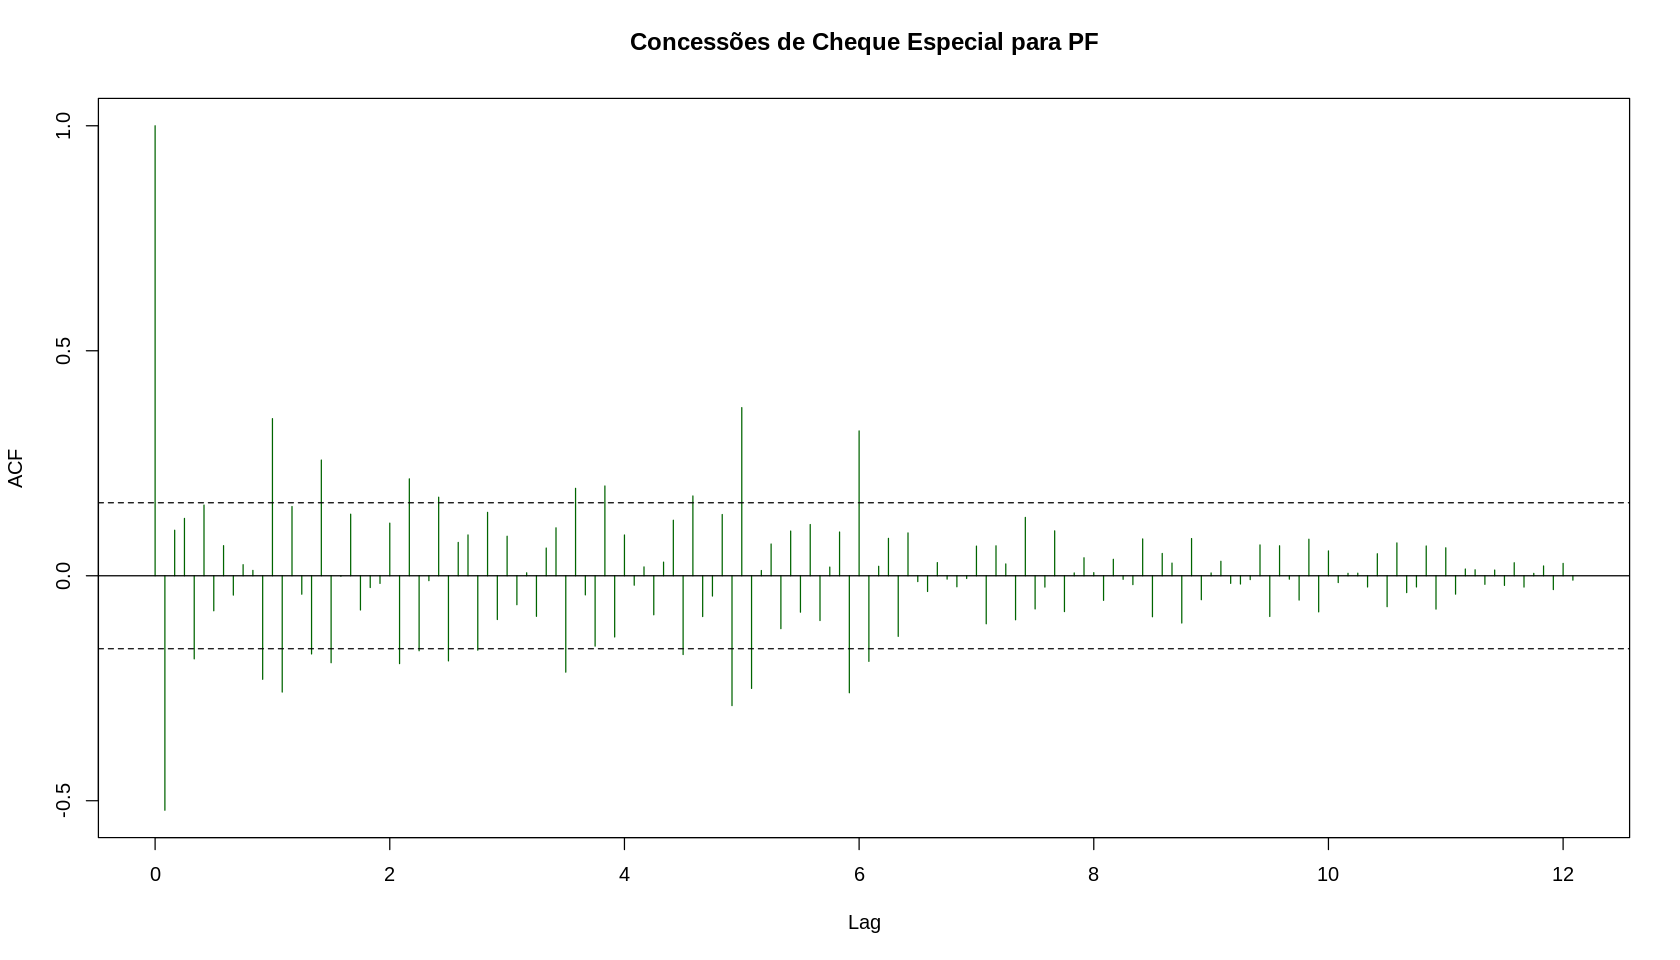

In [75]:
acf(sgs_diff$cheque_diff,
    main = "Concessões de Cheque Especial para PF",
    col = "darkgreen",
    ci.col = "black",
    lag.max = length(sgs_diff$cheque_diff) - 1)

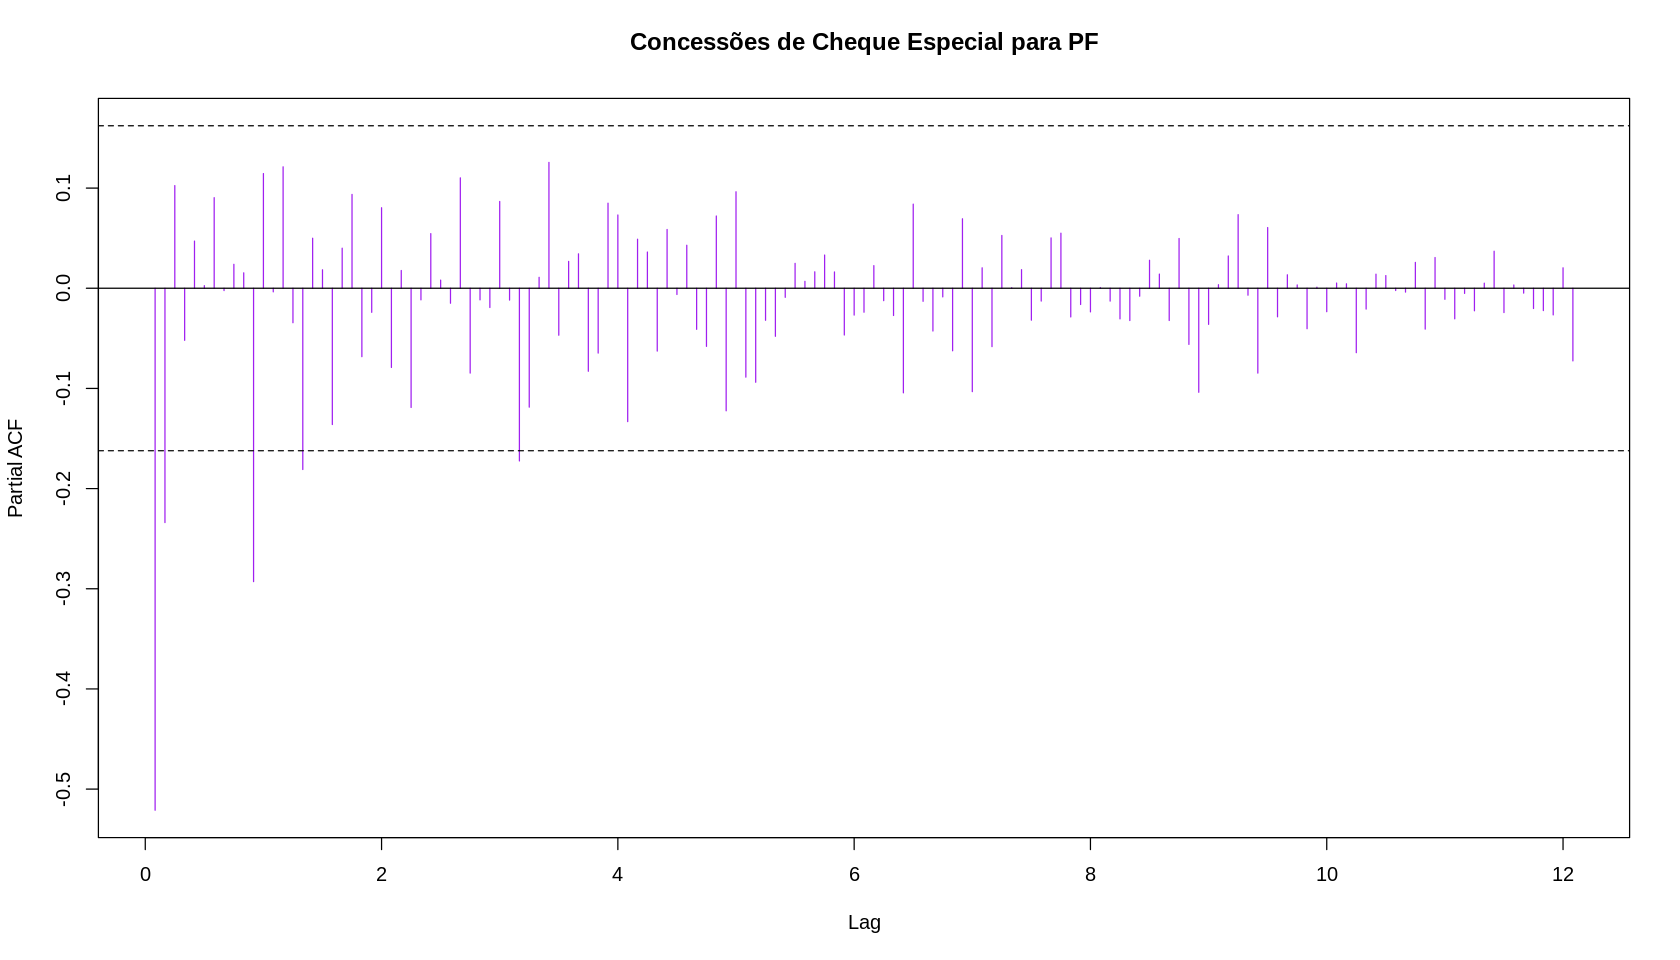

In [76]:
pacf( sgs_diff$cheque_diff,
      main = "Concessões de Cheque Especial para PF",
      col = "purple",
      ci.col = "black",
      lag.max = length(sgs_diff$cheque_diff) - 1)

In [77]:
summary( ur.df( sgs_diff$cheque_diff, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.259576 -0.025850  0.004068  0.029608  0.171325 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.755e-03  1.153e-02  -0.152 0.879280    
z.lag.1      -1.743e+00  5.069e-01  -3.438 0.000811 ***
tt            8.928e-05  1.320e-04   0.677 0.500019    
z.diff.lag1   1.689e-01  4.864e-01   0.347 0.729063    
z.diff.lag2   1.322e-02  4.568e-01   0.029 0.976969    
z.diff.lag3   8.930e-02  4.328e-01   0.206 0.836897    
z.diff.lag4   8.106e-02  4.125e-01   0.197 0.844548    
z.diff.lag5   1.698e-01  3.920e-01   0.433 0.665784    
z.diff.lag6   2.479e-01  3.696e-01   0.671 0.503667    
z.diff.lag7   3.150e-01  3.436e-01   0.917 0.361147    
z.diff.lag8   3.523e-0

In [78]:
summary( ur.kpss( sgs_diff$cheque_diff, type = "tau",     # média diferente de zero
                                        lags = "short"    # poucos lags
                                        ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0819 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Tendo como referência o teste KPSS, em módulo, o valor de test-statistic é menor que o valor crítico, o que significa que pode-se rejeitar a hipótese nula para o nível de significância escolhido de 5%

- Dessa forma, considera-se que a série não possui raiz unitária e torna-se estacionária após implementar 1 diferença.